<a href="https://colab.research.google.com/github/rcs1994/Teaching_DL4DEs_Fall_2025/blob/main/RK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 4th order Runge Kutta

The general form of the population growth differential equation
\begin{equation} y^{'}=t-y, \ \ (0 \leq t \leq 2) \end{equation}
with the initial condition
\begin{equation}y(0)=1,\end{equation}
Has the exact soulation. \begin{equation} y= 2e^{-t}+t-1.\end{equation}



#### Setting up Libraries

In [ ]:
import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")


## Defining the function
\begin{equation}f(t,y)=t-y\end{equation}

In [ ]:
def myfun_ty(t,y):
    return t-y

## Initial Setup
Defining the step size $h$ from the interval range $a\leq t \leq b$ and number of steps $N$
\begin{equation}h=\frac{b-a}{h}.\end{equation}
This gives the discrete time steps,
\begin{equation}t_{i}=t_0+ih,\end{equation}
where $t_0=a$.

In [ ]:
# Start and end of interval
b=2
a=0
# Step size
N=200
h=(b-a)/(N)
t=np.arange(a,b+h,h)

## Setting up the initial conditions of the equation
\begin{equation}w_0=IC\end{equation}


In [ ]:
# Initial Condition
IC=1
w=np.zeros(N+1)
y=(IC+1)*np.exp(-t)+t-1#np.zeros(N+1)
w[0]=IC

## 4th Order Runge Kutta
\begin{equation}k_1=f(t,y),\end{equation}
\begin{equation}k_2=f(t+\frac{h}{2},y+\frac{h}{2}k_1),\end{equation}
\begin{equation}k_3=f(t+\frac{h}{2},y+\frac{h}{2}k_2),\end{equation}
\begin{equation}k_4=f(t+h,y+h k_3),\end{equation}
\begin{equation}w_{i+1}=w_{i}+\frac{h}{6}(k_1+2k_2+2k_3+k_4).\end{equation}

In [ ]:
for k in range (0,N):
    k1=myfun_ty(t[k],w[k])
    k2=myfun_ty(t[k]+h/2,w[k]+h/2*k1)
    k3=myfun_ty(t[k]+h/2,w[k]+h/2*k2)
    k4=myfun_ty(t[k]+h,w[k]+h*k3)
    w[k+1]=w[k]+h/6*(k1+2*k2+2*k3+k4)

## Plotting Results

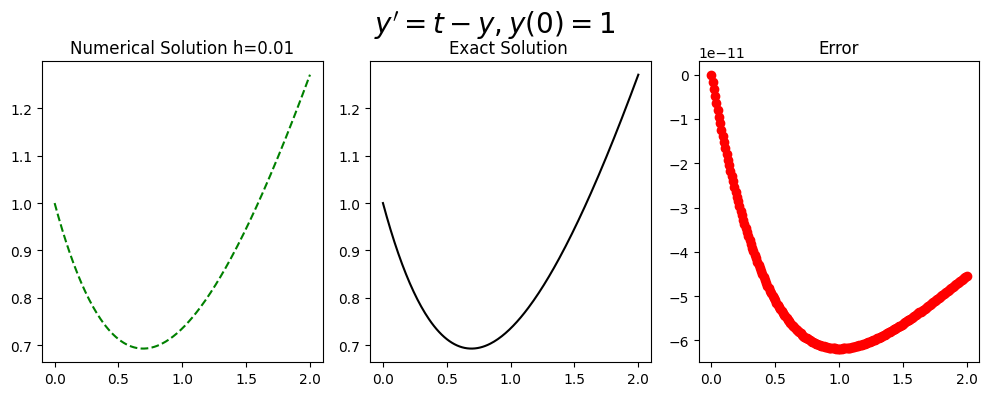

In [ ]:
fig = plt.figure(figsize=(10,4))
# --- left hand plot
ax = fig.add_subplot(1,3,1)
plt.plot(t,w, '--',color='green')
#ax.legend(loc='best')
plt.title('Numerical Solution h=%s'%(h))

ax = fig.add_subplot(1,3,2)
plt.plot(t,y,color='black')
plt.title('Exact Solution ')

ax = fig.add_subplot(1,3,3)
plt.plot(t,y-w, 'o',color='red')
plt.title('Error')
# --- title, explanatory text and save
fig.suptitle(r"$y'=t-y,   y(0)=%s$"%(IC), fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.85)

In [ ]:
import pandas as pd
d = {'time t_i': t, '4th Order Runge Kutta, w_i': w,'Exact':y,'Error |w-y|':np.round(np.abs(y-w),5)}
df = pd.DataFrame(data=d)
df

,time t_i,"4th Order Runge Kutta, w_i",Exact,Error |w-y|
0,0.00,1.000000,1.000000,0.0
1,0.01,0.990100,0.990100,0.0
2,0.02,0.980397,0.980397,0.0
3,0.03,0.970891,0.970891,0.0
4,0.04,0.961579,0.961579,0.0
...,...,...,...,...
196,1.96,1.241717,1.241717,0.0
197,1.97,1.248914,1.248914,0.0
198,1.98,1.256138,1.256138,0.0
199,1.99,1.263391,1.263391,0.0
